In [87]:
## Importing data
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot

In [2]:
path = r'C:\Users\Mary\Desktop\Data Analyst CF\26.07.2021Instacart Basket Analysis'

In [3]:
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

In [4]:
ords_prods_customers.head()

,order_id,user_id,eval_set,order_number,day_of_week,hour,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,registration_date,n_dependants,marital_status,income,check
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
# Data Security PII
ords_prods_customers.drop(columns = ['first_name', 'last_name'])

,order_id,user_id,eval_set,order_number,day_of_week,hour,days_since_prior_order,product_id,add_to_cart_order,reordered,...,median_days_since_prior_order,frequency_flag,gender,state,age,registration_date,n_dependants,marital_status,income,check
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,prior,26,4,23,5.0,19675,1,1,...,6.5,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both
32404855,484769,66343,prior,1,6,11,0.0,47210,1,0,...,24.5,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404856,1561557,66343,prior,2,1,11,30.0,47210,1,1,...,24.5,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404857,276317,66343,prior,3,6,15,19.0,47210,1,1,...,24.5,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both


In [6]:
# Creating regions

regions = []

for state in ords_prods_customers['state']:
    if (state == 'Wisconsin') or (state == 'Michigan') or (state == 'Illinois') or (state == 'Indiana') or (state == 'Ohio') or (state == 'North Dakota') or (state == 'South Dakota') or (state == 'Nebraska') or (state == 'Minnesota') or (state == 'Iowa') or (state == 'Missouri') or (state == 'Kansas'):
        regions.append('Midwest')
    elif (state == 'Maine') or (state == 'New Hampshire') or (state == 'Vermont') or (state == 'Massachusetts') or (state == 'Rhode Island') or (state == 'Connecticut') or (state == 'New York') or (state == 'Pennsylvania') or (state =='New Jersey'):
        regions.append('Northeast')
    elif (state == 'Deleware') or (state == 'Maryland') or (state == 'District of Columbia') or (state == 'Virginia') or (state == 'West Virginia') or (state == 'North Carolina') or (state == 'South Carolina') or (state == 'Georgia') or (state == 'Florida') or (state == 'Kentucky') or (state == 'Tennessee') or (state == 'Mississippi') or (state == 'Alabama') or (state == 'Oklahoma') or (state == 'Texas') or (state == 'Arkansas') or (state == 'Louisiana'):
        regions.append('South')
    else:
        regions.append('West')


In [7]:
ords_prods_customers['regions'] = regions

In [8]:
ords_prods_customers['regions'].value_counts(dropna = False)


South        10154861
West          8929937
Midwest       7597325
Northeast     5722736
Name: regions, dtype: int64

In [9]:
# Determine the spending differences between regions
crosstab = pd.crosstab(ords_prods_customers['regions'], ords_prods_customers['spending_flag'], dropna = False)

In [10]:
crosstab

spending_flag,High spender,Low spender
regions,,
Midwest,2497034,5100291
Northeast,1875170,3847566
South,3341162,6813699
West,2930556,5999381


In [11]:
# Exclusion flag for low-activity customers = less than 5 orders

In [12]:
pd.options.display.max_columns = None


In [13]:
ords_prods_customers.head()

,order_id,user_id,eval_set,order_number,day_of_week,hour,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,exists,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,median_days_since_prior_order,frequency_flag,first_name,last_name,gender,state,age,registration_date,n_dependants,marital_status,income,check,regions
0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,both,Mid-range product,Regular days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Most orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [14]:
ords_prods_customers['max_order'].value_counts(dropna = False)


99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
97      44949
98      44587
96      40453
2           6
1           5
Name: max_order, Length: 99, dtype: int64

In [15]:
ords_prods_customers.loc[ords_prods_customers['max_order']<5, 'activity'] = 'Low'

In [16]:
ords_prods_customers.loc[ords_prods_customers['max_order']>=5, 'activity'] = 'High'

In [17]:
ords_prods_customers['activity'].value_counts(dropna = False)


High    30964564
Low      1440295
Name: activity, dtype: int64

In [18]:
# Exclude the low activity customers
ords_prods_customers_new = ords_prods_customers[ords_prods_customers['max_order'] >= 5] 

In [19]:
ords_prods_customers_new.shape

(30964564, 36)

In [20]:
ords_prods_customers_new.head()

,order_id,user_id,eval_set,order_number,day_of_week,hour,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,exists,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,median_days_since_prior_order,frequency_flag,first_name,last_name,gender,state,age,registration_date,n_dependants,marital_status,income,check,regions,activity
0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,both,Mid-range product,Regular days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Most orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High


In [21]:
# Create department_name column:
result = []

for value in ords_prods_customers_new["department_id"]:
    if value == 1:
        result.append("frozen")
    elif value == 2:
        result.append("other")
    elif value == 3:
        result.append("bakery")    
    elif value == 4:
        result.append("produce")    
    elif value == 5:
        result.append("alcohol")    
    elif value == 6:
        result.append("international")    
    elif value == 7:
        result.append("beverages")    
    elif value == 8:
        result.append("pets")    
    elif value == 9:
        result.append("dry goods pasta")    
    elif value == 10:
        result.append("bulk")    
    elif value == 11:
        result.append("personal care")    
    elif value == 12:
        result.append("meat seafood")    
    elif value == 13:
        result.append("pantry")        
    elif value == 14:
        result.append("breakfast")        
    elif value == 15:
        result.append("canned goods")        
    elif value == 16:
        result.append("dairy eggs")        
    elif value == 17:
        result.append("household")        
    elif value == 18:
        result.append("babies")        
    elif value == 19:
        result.append("snacks")
    elif value == 20:
        result.append("deli")
    else:
        result.append("missing")


In [22]:
ords_prods_customers_new['department_name'] = result


<ipython-input-22-e8ae5c627428>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customers_new['department_name'] = result


In [23]:
ords_prods_customers_new['department_name'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department_name, dtype: int64

In [24]:
ords_prods_customers_new.shape

(30964564, 37)

In [25]:
ords_prods_customers_new.describe()

,order_number,day_of_week,hour,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,median_days_since_prior_order,age,n_dependants,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.783414e+01,2.741397e+00,1.341098e+01,1.023032e+01,2.559850e+04,8.363038e+00,6.061019e-01,7.118859e+01,9.922365e+00,7.790590e+00,3.442569e+01,9.337764e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,1.763442e+01,2.089254e+00,4.248845e+00,8.693523e+00,1.408096e+04,7.135399e+00,4.886127e-01,3.822194e+01,6.282441e+00,4.240595e+00,2.489504e+01,6.077206e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.528800e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,1.100000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [26]:
ords_prods_customers_new.head()

,order_id,user_id,eval_set,order_number,day_of_week,hour,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,exists,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,median_days_since_prior_order,frequency_flag,first_name,last_name,gender,state,age,registration_date,n_dependants,marital_status,income,check,regions,activity,department_name
0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,both,Mid-range product,Regular days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Most orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages


In [27]:
# Create a income flag
ords_prods_customers_new.loc[ords_prods_customers_new['income'] < 50000, 'income_level'] = 'Low-income'

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [28]:
ords_prods_customers_new.loc[(ords_prods_customers_new['income'] <= 100000) & (ords_prods_customers_new['income'] >= 50000), 'income_level'] = 'Mid-income' 

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [29]:
ords_prods_customers_new.loc[ords_prods_customers_new['income'] > 100000, 'income_level'] = 'High-income'

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [30]:
ords_prods_customers_new['income_level'].value_counts(dropna = False)


High-income    14207028
Mid-income     13394982
Low-income      3362554
Name: income_level, dtype: int64

In [31]:
ords_prods_customers_new.shape

(30964564, 38)

In [32]:
ords_prods_customers_new.head()

,order_id,user_id,eval_set,order_number,day_of_week,hour,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,exists,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,median_days_since_prior_order,frequency_flag,first_name,last_name,gender,state,age,registration_date,n_dependants,marital_status,income,check,regions,activity,department_name,income_level
0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,both,Mid-range product,Regular days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages,Low-income
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages,Low-income
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages,Low-income
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages,Low-income
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Most orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages,Low-income


In [33]:
ords_prods_customers_new.columns


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'day_of_week',
       'hour', 'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge', 'product_name', 'aisle_id', 'department_id',
       'prices', 'exists', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'median_days_since_prior_order', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'registration_date',
       'n_dependants', 'marital_status', 'income', 'check', 'regions',
       'activity', 'department_name', 'income_level'],
      dtype='object')

In [34]:
pd.options.display.max_rows = None

In [35]:
# Create age-range column
ords_prods_customers_new['age'].value_counts(dropna = False)


79    508337
49    507879
48    506730
31    506218
64    504832
68    501319
27    501071
43    499729
56    499580
73    499453
75    499229
54    497817
29    497291
35    496510
19    496077
44    494457
47    494052
23    492931
38    492790
80    492750
51    492218
22    490811
26    489892
55    489733
69    489495
21    489116
45    488088
37    487618
24    487608
30    486637
81    485847
39    485248
42    485081
34    484830
40    483323
59    480715
52    480429
70    480234
20    480194
72    479884
58    479842
53    479004
18    478457
77    477999
76    477348
74    477168
63    474757
32    474676
62    473859
57    473657
46    472571
67    472533
33    472331
78    471119
50    468776
28    464831
65    464710
61    463615
71    463515
60    461897
36    460649
66    454604
41    451269
25    449324
Name: age, dtype: int64

In [36]:
ords_prods_customers_new.loc[(ords_prods_customers_new['age'] <= 30) & (ords_prods_customers_new['age'] >= 18), 'age_range'] = '18-30' 

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [37]:
ords_prods_customers_new.loc[(ords_prods_customers_new['age'] <= 40) & (ords_prods_customers_new['age'] > 30), 'age_range'] = '31-40' 

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [38]:
ords_prods_customers_new.loc[(ords_prods_customers_new['age'] <= 50) & (ords_prods_customers_new['age'] > 40), 'age_range'] = '41-50' 

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [39]:
ords_prods_customers_new.loc[(ords_prods_customers_new['age'] <= 60) & (ords_prods_customers_new['age'] > 50), 'age_range'] = '51-60' 

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [40]:
ords_prods_customers_new.loc[(ords_prods_customers_new['age'] > 60), 'age_range'] = '60 +' 

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [41]:
ords_prods_customers_new['age_range'].value_counts(dropna = False)


60 +     10112607
18-30     6304240
41-50     4868632
31-40     4844193
51-60     4834892
Name: age_range, dtype: int64

In [42]:
ords_prods_customers_new.shape

(30964564, 39)

In [43]:
ords_prods_customers_new.head()

,order_id,user_id,eval_set,order_number,day_of_week,hour,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,exists,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,median_days_since_prior_order,frequency_flag,first_name,last_name,gender,state,age,registration_date,n_dependants,marital_status,income,check,regions,activity,department_name,income_level,age_range
0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,both,Mid-range product,Regular days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages,Low-income,31-40
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages,Low-income,31-40
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages,Low-income,31-40
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages,Low-income,31-40
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Slowest days,Most orders,10,New Customer,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High,beverages,Low-income,31-40


In [44]:
ords_prods_customers_new.rename(columns = {'age_range' : 'age_groups'}, inplace = True)

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [45]:
# Export df
ords_prods_customers_new.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customers_new410.pkl'))

In [46]:
# Preparing sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customers_new)) <= 0.7

In [47]:
big = ords_prods_customers_new[dev]

In [48]:
small = ords_prods_customers_new[~dev]

                 prices
regions                
Northeast  1.274711e+07
Midwest    1.699564e+07
West       1.993563e+07
South      2.268622e+07


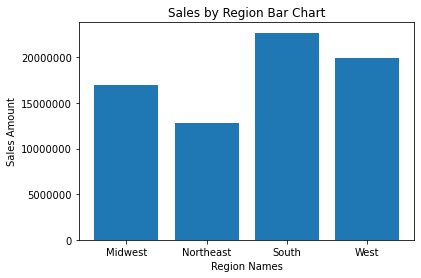

In [77]:
# Sales per Region
sales_groupedby_region = small.groupby('regions')[['prices']].sum()
print(sales_groupedby_region.sort_values(by = ['prices']))

fig, ax = plt.subplots()

ax.bar(sales_groupedby_region.index, sales_groupedby_region['prices'])

plt.title('Sales by Region Bar Chart')
plt.xlabel('Region Names')
plt.ylabel('Sales Amount')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

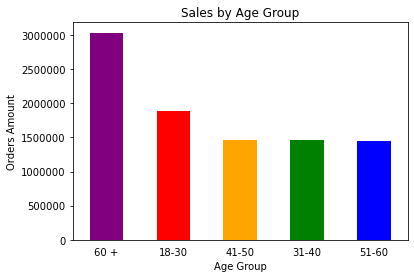

In [100]:
# Age Groups
bar = small['age_groups'].value_counts().plot.bar(color =['purple', 'red', 'orange','green', 'blue'])

plt.title('Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Orders Amount')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(color = 'black', rotation = 0, horizontalalignment = 'right')
for tick in bar.xaxis.get_major_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')


plt.show()

